# Draw random samples from $\mathcal{N}(0,1)$ by the inverse transform from $\mathcal{U}(0,1)$

## CDF of $\mathcal{N}(0, 1)$

* Suppose we compute the CDF of $\mathcal{N}(0, 1)$ in $[-5, 5]$.  Let `x` be the array of sampling points.
* Compute the value of $\mathcal{N}(0, 1)$ at `x` as an array `pdf`.
* Compute the CDF of $\mathcal{N}(0, 1)$ at `x` as an array `cdf`.

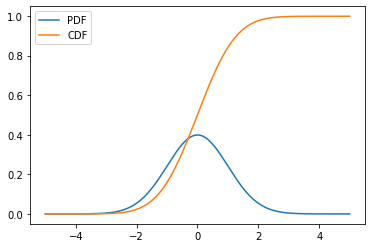

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def normal(x):
    # implement here
    return np.exp(- x**2 / 2) / (2 * np.pi)**0.5

def pdf2cdf(pdf):
    # implement here
    dt = 10 / pdf.shape[0]
    cdf = np.zeros_like(pdf)
    cdf[0] = pdf[0]
    for i in range(1, pdf.shape[0]):
        cdf[i] = cdf[i-1] + pdf[i] * dt
    return cdf


## Do not edit hereafter ##

x = np.linspace(-5, 5, 1000)
pdf = normal(x)
cdf = pdf2cdf(pdf)

plt.plot(x, pdf, label='PDF')
plt.plot(x, cdf, label='CDF')
plt.legend()
plt.show()


## Generate random samples using $\mathcal{U}(0,1)$

* The inverse of CDF can be implemented by finding the nearest value and its index in `cdf`.
  * In this assignment, *nearest* is not necessarily strict for simplicity; meaning that it can be either the most nearest or the 2nd nearest.
  * Once the index of the nearest value in `cdf` is found, then the value of `x` at the same index is the corresponding random value in $\mathcal{N}(0, 1)$.

mu=-0.0006419919919920051, var=1.0039892474257814


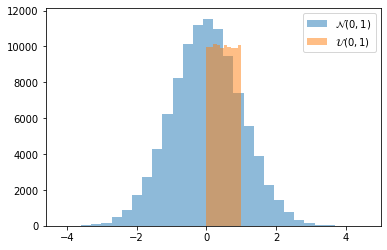

In [20]:
# random samples from U(0,1)
y = np.random.uniform(0, 1, 100000)



# implement here
# convert y to z using cdf.  z is the corresponding random value from N(0, 1).

def cdf_inv(x, y, cdf):
    z = np.zeros_like(y)
    for i in range(y.shape[0]):
        for j in range(1, cdf.shape[0]):
            if cdf[j-1] <= y[i] <= cdf[j]:
                z[i] = x[j]
                break
    return z

z = cdf_inv(x, y, cdf)


## Do not edit hereafter ##

# sample mean and var
mu = np.mean(z)
var = np.var(z)
print(f'mu={mu}, var={var}')

plt.hist(z, bins=30, alpha=0.5, label=r'$\mathcal{N}(0,1)$')
plt.hist(y, bins=10, alpha=0.5, label=r'$\mathcal{U}(0,1)$')
plt.legend()
plt.show()
